In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
airbnb_data = pd.read_csv('AB_NYC_2019.csv')
airbnb_df = pd.DataFrame(airbnb_data)
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
len(airbnb_df['id'])

48895

In [4]:
del airbnb_df['name'],airbnb_df['host_name']

In [5]:
airbnb_df.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


last_review and reviews_per_month are missing values compared to the rest of the data
likely due to listings have zero reviews...

In [6]:
airbnb_df.count()

id                                48895
host_id                           48895
neighbourhood_group               48895
neighbourhood                     48895
latitude                          48895
longitude                         48895
room_type                         48895
price                             48895
minimum_nights                    48895
number_of_reviews                 48895
last_review                       38843
reviews_per_month                 38843
calculated_host_listings_count    48895
availability_365                  48895
dtype: int64

In [7]:
airbnb_df['reviews_per_month'] = airbnb_df['reviews_per_month'].fillna(0)
airbnb_df.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,0.00,1,365
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [8]:
airbnb_df['last_review'] = airbnb_df['last_review'].replace(np.nan, '9999-12-31') # last_review is a string
airbnb_df.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,9999-12-31,0.00,1,365
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Trying to determine if there's a correlation between price and minimum nights of stay in greater NY area

The r-squared is: 0.0018317830031101443
The correlation between Price and Minimum Nights is: 0.04


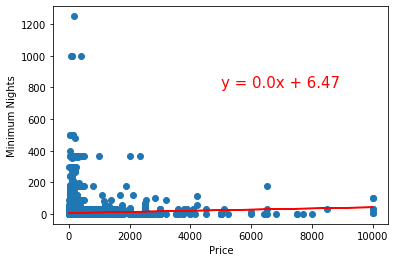

In [9]:
# Calculating the correlation between price and number of nights

from scipy.stats import linregress

def create_linregress(x_values, y_values, x_label, y_label, x_annotation, y_annotation):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    plt.scatter(x_values,y_values)
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.annotate(line_eq,(x_annotation,y_annotation),fontsize=15,color="red")
    plt.plot(x_values,regress_values,"r-")
    print(f"The r-squared is: {rvalue**2}")
    correlation = st.pearsonr(x_values, y_values)
    print(f"The correlation between {x_label} and {y_label} is: {round(correlation[0], 2)}")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

create_linregress(airbnb_df['price'], airbnb_df['minimum_nights'], 'Price', 'Minimum Nights', 5000, 800)



There seems to be very high numbers in both minimum nights and price, let's get a better picture by limiting them both

The r-squared is: 0.00298061521105119
The correlation between Price and Minimum Nights is: 0.05


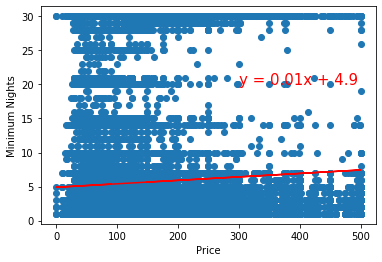

In [10]:
# Removing the prices over 500$

airbnb_df_500 = airbnb_df.loc[airbnb_df['price'] <= 500]

# Removing the minimum nights over 180

airbnb_df_limited_by_nights_and_price = airbnb_df_500.loc[airbnb_df_500['minimum_nights'] <= 30]

create_linregress(airbnb_df_limited_by_nights_and_price['price'], airbnb_df_limited_by_nights_and_price['minimum_nights'], 'Price', 'Minimum Nights', 300, 20)

# There is still no correlation between price and minimum nights in greater NY

#### Creating a mid price range by neighbourhood group and neighbourhood

In [11]:
# Re-Grouping neighbourhood by columns
neighbourhood_by_price = airbnb_df[['neighbourhood_group','neighbourhood','number_of_reviews','price','reviews_per_month','minimum_nights','availability_365']].groupby(['neighbourhood_group','neighbourhood']).mean()

# Organizing dataframe by mid-price options
neighbourhood_by_mid_price = neighbourhood_by_price.loc[neighbourhood_by_price['price'] >= 100]
neighbourhood_by_mid_price = neighbourhood_by_mid_price.loc[neighbourhood_by_price['price'] <= 400]

# Sorting values by number of reviews to see the popular neighbourhoods in mid price range
neighbourhood_by_mid_price = neighbourhood_by_mid_price.sort_values(by='number_of_reviews', ascending=False)

neighbourhood_by_mid_price.head(20)

number_of_reviews       price  \
neighbourhood_group neighbourhood                                       
Staten Island       Eltingville                 76.000000  141.666667   
                    Huguenot                    55.666667  118.333333   
Brooklyn            Manhattan Beach             50.625000  103.500000   
Bronx               City Island                 42.166667  173.000000   
Queens              Bay Terrace                 41.500000  142.000000   
Staten Island       St. George                  41.395833  118.145833   
                    New Brighton                40.200000  101.800000   
                    Lighthouse Hill             39.000000  157.500000   
Brooklyn            DUMBO                       38.388889  196.305556   
                    South Slope                 36.637324  146.725352   
                    Canarsie                    36.312925  104.367347   
Queens              Middle Village              34.032258  109.580645   
                    St. Albans                  34.000000  100.828947   
Brooklyn            Cypress Hills               33.200000  128.903704   
Manhattan           East Harlem                 32.628469  133.198747   
Queens              Jamaica Estates             31.368421  182.947368   
Brooklyn            Gowanus                     31.210526  158.801619   
Staten Island       Rosebank                    30.714286  111.857143   
Brooklyn            Prospect Heights            30.462185  173.372549   
                    Bedford-Stuyvesant          29.712439  107.678244   

                                        reviews_per_month  minimum_nights  \
neighbourhood_group neighbourhood                                           
Staten Island       Eltingville                  1.646667        5.333333   
                    Huguenot                     3.760000        1.666667   
Brooklyn            Manhattan Beach              1.283750        6.000000   
Bronx               City Island                  1.707778        2.055556   
Queens              Bay Terrace                  0.936667        2.500000   
Staten Island       St. George                   1.481458       10.583333   
                    New Brighton                 2.416000        7.800000   
                    Lighthouse Hill              1.165000        2.000000   
Brooklyn            DUMBO                        0.918056        7.666667   
                    South Slope                  1.062359        6.658451   
                    Canarsie                     1.971361        2.292517   
Queens              Middle Village               1.665806        6.225806   
                    St. Albans                   2.283947        1.881579   
Brooklyn            Cypress Hills                1.855778        6.355556   
Manhattan           East Harlem                  1.413662        5.857654   
Queens              Jamaica Estates              2.087895        1.947368   
Brooklyn            Gowanus                      1.174332        5.550607   
Staten Island       Rosebank                     3.812857        2.142857   
Brooklyn            Prospect Heights             0.947843        5.689076   
                    Bedford-Stuyvesant           1.312472        5.689284   

                                        availability_365  
neighbourhood_group neighbourhood                         
Staten Island       Eltingville               193.000000  
                    Huguenot                  208.000000  
Brooklyn            Manhattan Beach           205.625000  
Bronx               City Island               131.222222  
Queens              Bay Terrace               222.500000  
Staten Island       St. George                191.750000  
                    New Brighton              142.600000  
                    Lighthouse Hill           215.500000  
Brooklyn            DUMBO                     114.472222  
                    South Slope                83.760563  
                    Canarsie  

#### Analyzing correlation between parameters in mid price range

The r-squared is: 0.0851905232519363
The correlation between Price and Minimum Nights is: 0.29


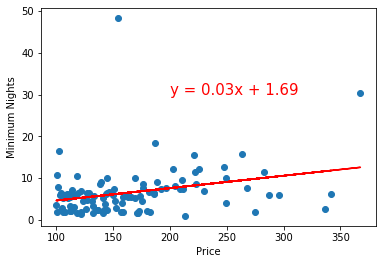

In [13]:
create_linregress(neighbourhood_by_mid_price['price'], neighbourhood_by_mid_price['minimum_nights'], 'Price', 'Minimum Nights', 200, 30)



The r-squared is: 0.02197968313485831
The correlation between Number of Reviews and Minimum Nights is: -0.15


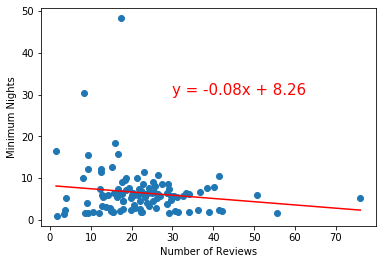

In [14]:
create_linregress(neighbourhood_by_mid_price['number_of_reviews'], neighbourhood_by_mid_price['minimum_nights'], 'Number of Reviews', 'Minimum Nights', 30, 30)


The r-squared is: 0.07081168511581708
The correlation between Number of Reviews and Price is: -0.27


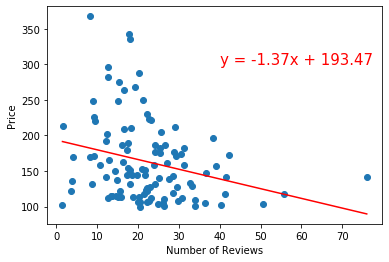

In [15]:
create_linregress(neighbourhood_by_mid_price['number_of_reviews'], neighbourhood_by_mid_price['price'], 'Number of Reviews', 'Price', 40, 300)



we can find out how many months the listing has been active by dividing number_of_reviews by reviews_per_month

We can add the parameter months_lister_for but number_of_reviews is already helping us with that info

#### Creating a low price range by neighbourhood group and neighbourhood

In [16]:
# Organizing dataframe by low-price options
neighbourhood_by_low_price = neighbourhood_by_price.loc[neighbourhood_by_price['price'] < 100]

# Sorting values by number of reviews to see the popular neighbourhoods in low price range
neighbourhood_by_low_price = neighbourhood_by_low_price.sort_values(by='number_of_reviews', ascending=False)

neighbourhood_by_low_price.head(20)

,,number_of_reviews,price,reviews_per_month,minimum_nights,availability_365
neighbourhood_group,neighbourhood,,,,,
Staten Island,Silver Lake,118.500000,70.000000,4.340000,2.500000,162.000000
Queens,East Elmhurst,81.659459,81.183784,4.458000,1.805405,169.491892
Staten Island,Richmondtown,79.000000,78.000000,2.560000,3.000000,300.000000
Bronx,Mount Eden,70.000000,58.500000,1.486667,1.833333,136.166667
Queens,Springfield Gardens,69.094118,94.235294,4.193176,2.023529,204.011765
Staten Island,Tompkinsville,57.142857,76.190476,2.107857,2.309524,209.428571
Bronx,Highbridge,48.814815,71.111111,1.801111,4.148148,158.555556
Queens,South Ozone Park,48.675000,82.400000,3.019750,3.100000,226.100000
Bronx,East Morrisania,48.000000,85.000000,2.618000,1.400000,193.500000


In [17]:
# airbnb_df['months_listed_for'] = round(airbnb_df['number_of_reviews'] / airbnb_df['reviews_per_month'], 2)

# type(airbnb_df['months_listed_for'][0])

# airbnb_df['months_listed_for'] = airbnb_df['months_listed_for'].replace(np.nan, 0) # last_review is a string

# cols = airbnb_df.columns.tolist()


# airbnb_df = airbnb_df.loc[:, ['id', 'host_id', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'months_listed_for', 'calculated_host_listings_count', 'availability_365']]

# airbnb_df

In [18]:
airbnb_df.loc[:,['price','minimum_nights','number_of_reviews','availability_365']].describe()

,price,minimum_nights,number_of_reviews,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000
mean,152.720687,7.029962,23.274466,112.781327
std,240.154170,20.510550,44.550582,131.622289
min,0.000000,1.000000,0.000000,0.000000
25%,69.000000,1.000000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,45.000000
75%,175.000000,5.000000,24.000000,227.000000
max,10000.000000,1250.000000,629.000000,365.000000


Create bins on reviews and use groupby to try and formualte ideas about certain trends

In [19]:
#review_bins = [-1,0.9,3.9,10.9,50.9,100.9,650]
#review_bin_names = ['0','1-3','4-10','11-50','51-100','>101']
#airbnb_df['review range'] = pd.cut(airbnb_df['number_of_reviews'],review_bins,labels=review_bin_names)
#airbnb_df.head()

In [20]:
#airbnb_df['review range'].value_counts()

In [21]:
#neighbourhood_by_review = airbnb_df[['neighbourhood_group','review range','price','minimum_nights','availability_365','number_of_reviews']].groupby(['neighbourhood_group','review range']).mean()
#neighbourhood_by_review

Create bins on price and use groupby to try and formualte ideas about certain trends

In [22]:

price_bins = [0,49.9,99.9,149.9,249.9,499.9,10001]
price_bin_names = ['0-49','50-99','100-149','150-249','250-499','>500']
airbnb_df['price range'] = pd.cut(airbnb_df['price'],price_bins,labels=price_bin_names)
neighbourhood_by_price = airbnb_df[['neighbourhood_group','price range','number_of_reviews','minimum_nights','availability_365']].groupby(['neighbourhood_group','price range']).mean()
neighbourhood_by_price


number_of_reviews  minimum_nights  \
neighbourhood_group price range                                      
Bronx               0-49                 25.153355        4.690096   
                    50-99                28.552063        5.084479   
                    100-149              26.736527        3.910180   
                    150-249              15.048387        2.774194   
                    250-499              16.333333        2.366667   
                    >500                  2.444444        2.444444   
Brooklyn            0-49                 16.468248        7.787226   
                    50-99                23.923360        5.472348   
                    100-149              29.251578        6.199126   
                    150-249              27.201180        5.760326   
                    250-499              20.082797        6.130225   
                    >500                 13.562724        7.405018   
Manhattan           0-49                 18.070735        9.830791   
                    50-99                26.642830        7.272488   
                    100-149              23.790432        8.578747   
                    150-249              19.366667        9.204147   
                    250-499              14.928858        9.049914   
                    >500                 10.447514        8.953591   
Queens              0-49                 27.610199        8.119274   
                    50-99                31.399926        3.918390   
                    100-149              24.551148        5.411273   
                    150-249              20.323729        4.303390   
                    250-499              19.391705        3.230415   
                    >500                  7.083333       25.805556   
Staten Island       0-49                 34.964706        4.258824   
                    50-99                34.798780        4.182927   
                    100-149              25.636364        7.590909   
                    150-249              25.473684        3.763158   
                    250-499              14.357143        5.428571   
                    >500                  0.166667        5.666667   

                                 availability_365  
neighbourhood_group price range                    
Bronx               0-49               151.897764  
                    50-99              168.787819  
                    100-149            169.520958  
                    150-249            154.129032  
                    250-499            255.366667  
                    >500               192.444444  
Brooklyn            0-49                98.220803  
                    50-99               94.243286  
                    100-149             96.766634  
                    150-249            105.750492  
                    250-499            122.974277  
                    >500               173.322581  
Manhattan           0-49                82.239945  
                    50-99               90.241250  
                    100-149             96.417866  
                    150-249            119.013978  
                    250-499            141.282559  
                    >500               181.192265  
Queens              0-49               144.797753  
                    50-99              140.923191  
                    100-149            136.496868  
                    150-249            147.577966  
                    250-499            201.391705  
                    >500               216.000000  
Staten Island       0-49               215.364706  
                    50-99              193.250000  
                    100-149            215.878788  
                    150-249            174.815789  
                    250-499            154.214286  
                    >500               238.500000

In [23]:
room_type_by_price = airbnb_df[['room_type','price range','number_of_reviews','minimum_nights','availability_365']].groupby(['room_type','price range']).mean()
room_type_by_price

number_of_reviews  minimum_nights  \
room_type       price range                                      
Entire home/apt 0-49                 29.652174        7.930435   
                50-99                27.560927        8.957952   
                100-149              26.096371        8.720405   
                150-249              22.687189        8.306040   
                250-499              17.032173        8.414095   
                >500                 12.269524        7.921905   
Private room    0-49                 20.236228        7.892857   
                50-99                26.099252        4.995990   
                100-149              26.688312        3.885281   
                150-249              17.505155        3.639968   
                250-499               9.711779        3.789474   
                >500                  3.442529       16.040230   
Shared room     0-49                 17.568882        7.980551   
                50-99                18.511628        2.733850   
                100-149               9.853333       15.880000   
                150-249               5.377778        3.711111   
                250-499               9.956522        2.869565   
                >500                  3.181818        4.090909   

                             availability_365  
room_type       price range                    
Entire home/apt 0-49                84.495652  
                50-99               86.208524  
                100-149             93.694081  
                150-249            114.808209  
                250-499            137.505581  
                >500               180.060952  
Private room    0-49               101.781046  
                50-99              107.513072  
                100-149            119.673779  
                150-249            130.020619  
                250-499            169.964912  
                >500               189.683908  
Shared room     0-49               188.094003  
                50-99              133.888889  
                100-149            136.813333  
                150-249            115.088889  
                250-499            127.565217  
                >500               109.636364

In [29]:
trial_df = airbnb_df.loc[(airbnb_df['neighbourhood_group'] == 'Bronx') & (airbnb_df['neighbourhood'] == 'Highbridge')]

trial_df

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price range
171,44096,190409,Bronx,Highbridge,40.83232,-73.93184,Private room,40,1,219,2019-07-04,2.04,3,353,0-49
207,54626,190409,Bronx,Highbridge,40.83075,-73.93058,Private room,45,1,138,2019-06-30,1.45,3,323,0-49
6418,4671824,190409,Bronx,Highbridge,40.83212,-73.93054,Private room,60,1,56,2019-06-23,1.09,3,355,50-99
10871,8386220,2422554,Bronx,Highbridge,40.83746,-73.92268,Private room,59,4,51,2017-02-24,1.11,2,0,50-99
17735,13920551,80974010,Bronx,Highbridge,40.83736,-73.92318,Private room,22,3,14,2017-10-10,0.39,1,42,0-49
18203,14255485,5682956,Bronx,Highbridge,40.84277,-73.92588,Entire home/apt,76,7,40,2019-05-27,1.15,1,34,50-99
19565,15648096,100971588,Bronx,Highbridge,40.83844,-73.92489,Entire home/apt,75,4,37,2019-07-07,1.21,1,26,50-99
21642,17367187,11196496,Bronx,Highbridge,40.83173,-73.92824,Private room,75,1,127,2019-06-30,4.45,1,134,50-99
22881,18540170,128692351,Bronx,Highbridge,40.84289,-73.92688,Private room,100,2,107,2019-06-14,4.12,5,344,100-149
22942,18584742,128692351,Bronx,Highbridge,40.84111,-73.92513,Private room,80,2,100,2019-06-23,3.86,5,338,50-99


In [32]:
import requests

for index, row in trial_df.iterrows():
    neighbourhood = row["neighbourhood"]
    neighbourhood_group = row["neighbourhood_group"]
    print(f'Looking for crime rate in index no:{index} | {neighbourhood} | {neighbourhood_group}')
    lat = row["latitude"]
    lng = row["longitude"]
    url = 'https://data.cityofnewyork.us/resource/qb7u-rbmr.json?$where=within_circle'
    query_url = url + f"(lat_lon, {lat}, {lng}, 5000)"
    
    response = requests.get(query_url)
    data = response.json()
    
    try:
        trial_df.loc[index,'Number of Crimes'] = len(data)
        trial_df.loc[index,'Crime Type 1'] = data[0]['law_cat_cd']
        trial_df.loc[index,'Crime Type 2'] = data[1]['law_cat_cd']
        trial_df.loc[index,'Crime Type 3'] = data[2]['law_cat_cd']
    except:
        print(f"missing value for row number {index}")

trial_df





Looking for crime rate in index no:171 | Highbridge | Bronx


C:\Users\ulast\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Looking for crime rate in index no:207 | Highbridge | Bronx
Looking for crime rate in index no:6418 | Highbridge | Bronx
Looking for crime rate in index no:10871 | Highbridge | Bronx
Looking for crime rate in index no:17735 | Highbridge | Bronx
Looking for crime rate in index no:18203 | Highbridge | Bronx
missing value for row number 18203
Looking for crime rate in index no:19565 | Highbridge | Bronx
Looking for crime rate in index no:21642 | Highbridge | Bronx
Looking for crime rate in index no:22881 | Highbridge | Bronx
missing value for row number 22881
Looking for crime rate in index no:22942 | Highbridge | Bronx
missing value for row number 22942
Looking for crime rate in index no:23639 | Highbridge | Bronx
Looking for crime rate in index no:26025 | Highbridge | Bronx
missing value for row number 26025
Looking for crime rate in index no:26031 | Highbridge | Bronx
missing value for row number 26031
Looking for crime rate in index no:26032 | Highbridge | Bronx
Looking for crime rate

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price range,Number of Crimes,Crime Type 1,Crime Type 2,Crime Type 3
171,44096,190409,Bronx,Highbridge,40.83232,-73.93184,Private room,40,1,219,2019-07-04,2.04,3,353,0-49,3.0,FELONY,MISDEMEANOR,MISDEMEANOR
207,54626,190409,Bronx,Highbridge,40.83075,-73.93058,Private room,45,1,138,2019-06-30,1.45,3,323,0-49,4.0,FELONY,MISDEMEANOR,MISDEMEANOR
6418,4671824,190409,Bronx,Highbridge,40.83212,-73.93054,Private room,60,1,56,2019-06-23,1.09,3,355,50-99,3.0,FELONY,MISDEMEANOR,MISDEMEANOR
10871,8386220,2422554,Bronx,Highbridge,40.83746,-73.92268,Private room,59,4,51,2017-02-24,1.11,2,0,50-99,3.0,FELONY,MISDEMEANOR,MISDEMEANOR
17735,13920551,80974010,Bronx,Highbridge,40.83736,-73.92318,Private room,22,3,14,2017-10-10,0.39,1,42,0-49,3.0,FELONY,MISDEMEANOR,MISDEMEANOR
18203,14255485,5682956,Bronx,Highbridge,40.84277,-73.92588,Entire home/apt,76,7,40,2019-05-27,1.15,1,34,50-99,2.0,FELONY,MISDEMEANOR,NaN
19565,15648096,100971588,Bronx,Highbridge,40.83844,-73.92489,Entire home/apt,75,4,37,2019-07-07,1.21,1,26,50-99,3.0,FELONY,MISDEMEANOR,MISDEMEANOR
21642,17367187,11196496,Bronx,Highbridge,40.83173,-73.92824,Private room,75,1,127,2019-06-30,4.45,1,134,50-99,3.0,FELONY,MISDEMEANOR,MISDEMEANOR
22881,18540170,128692351,Bronx,Highbridge,40.84289,-73.92688,Private room,100,2,107,2019-06-14,4.12,5,344,100-149,2.0,FELONY,MISDEMEANOR,NaN
22942,18584742,128692351,Bronx,Highbridge,40.84111,-73.92513,Private room,80,2,100,2019-06-23,3.86,5,338,50-99,2.0,FELONY,MISDEMEANOR,NaN
